Librerias necesarias

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import seaborn as sns
%matplotlib inline
#La última línea permitirá que las gráficas se "incrusten" en el notebook.

Abrir archivo

In [ ]:
# Utiliza la URL "raw" del archivo Excel
ruta = "https://raw.githubusercontent.com/JuanAraque11/PPI/main/Lista-de-clientes-con-nombre-y-direccion.xlsx"

# Cargar el dataset a partir de la ruta establecida
response = requests.get(ruta)

if response.status_code == 200:
    # Utiliza pd.read_excel con un objeto file-like
    with pd.ExcelFile(response.content) as xls:
        df = pd.read_excel(xls)
    print(df.head())
else:
    print("Error al cargar el archivo:", response.status_code)


Resumen estadístico de los datos

In [25]:
# Mostrar un resumen estadístico de las columnas numéricas
print(df.describe())

# Contar los valores únicos en cada columna
print(df.nunique())


                 Fecha de nacimiento                  Fecha de alta
count                            999                            999
mean   1985-05-27 11:43:25.405405376  2013-03-02 19:04:58.496496384
min              1970-01-01 00:00:00            2005-02-18 08:08:17
25%              1977-12-22 00:00:00            2009-02-05 23:47:33
50%              1985-07-12 00:00:00            2013-01-27 15:41:25
75%              1992-12-08 12:00:00     2017-04-08 09:00:02.500000
max              2000-05-02 00:00:00            2021-05-10 12:02:52
ID                           999
Nombre completo              999
Fecha de nacimiento          956
Dirección                    905
Localidad y Código postal    785
Teléfono                     999
Correo electrónico           977
Fecha de alta                999
Grupo de clientes              5
dtype: int64


Frecuencia de valores categóricos

In [31]:
# Contar la frecuencia de los valores en la columna 'Grupo de clientes'
print(df['Grupo de clientes'].value_counts())

# Contar la frecuencia de los valores en la columna 'Localidad y codigo postal'
print(df['Localidad y Código postal'].value_counts())

Grupo de clientes
A    208
E    208
D    203
C    190
B    190
Name: count, dtype: int64
Localidad y Código postal
London                       94
Poughkeepsie, NY 12601        3
Rego Park, NY 11374           3
Troy, NY 12180                2
Brooklyn, NY 11229            2
                             ..
53 Old Belmont St.            1
9451 Stonybrook Court         1
5 Rockland Court              1
209 North Primrose Street     1
93 Magnolia Ave.              1
Name: count, Length: 785, dtype: int64


Análisis de fechas

In [27]:
# Convertir la columna 'Fecha de alta' a tipo datetime si aún no lo es
df['Fecha de alta'] = pd.to_datetime(df['Fecha de alta'])

# Calcular la edad de los clientes a partir de la fecha de nacimiento
df['Edad'] = pd.Timestamp.now().year - pd.to_datetime(df['Fecha de nacimiento']).dt.year

# Calcular la antigüedad de los clientes desde la fecha de alta
df['Antigüedad'] = (pd.Timestamp.now() - df['Fecha de alta']).dt.days

# Mostrar estadísticas sobre la edad y la antigüedad
print(df[['Edad', 'Antigüedad']].describe())


             Edad   Antigüedad
count  999.000000   999.000000
mean    39.081081  4054.292292
std      8.741926  1727.535971
min     24.000000  1064.000000
25%     32.000000  2556.500000
50%     39.000000  4088.000000
75%     47.000000  5540.500000
max     54.000000  6989.000000


Análisis de correlación

In [32]:
# Excluir columnas no numéricas antes de calcular la matriz de correlación
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación entre las columnas numéricas
correlation_matrix = df_numeric.corr()
print(correlation_matrix)


            Antigüedad
Antigüedad         1.0


Distribución de edades

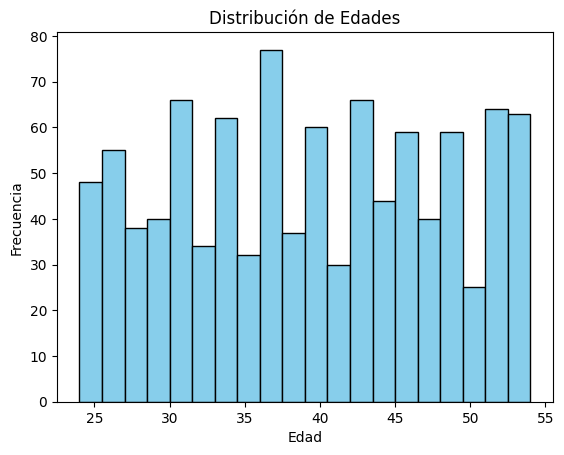

In [33]:
# Graficar la distribución de edades
plt.hist(df['Edad'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades')
plt.show()

Clientes por grupo

<ipython-input-35-5bdf22693d20>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Grupo de clientes', data=df, palette='Set2')


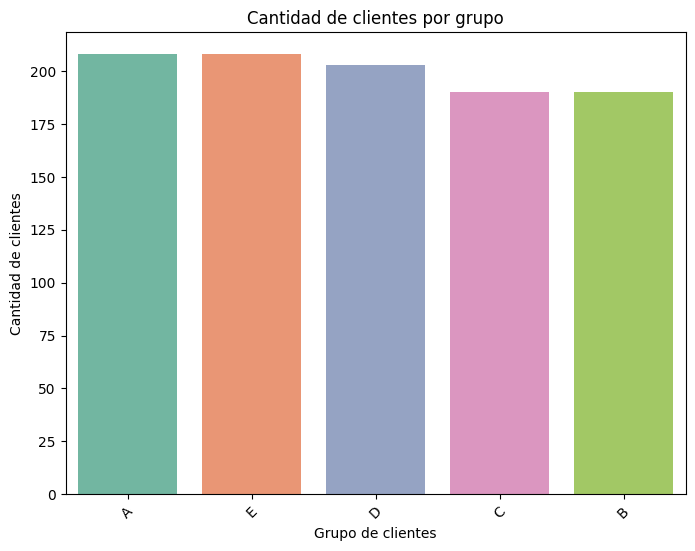

In [35]:
# Graficar la cantidad de clientes por grupo
plt.figure(figsize=(8, 6))
sns.countplot(x='Grupo de clientes', data=df, palette='Set2')
plt.xlabel('Grupo de clientes')
plt.ylabel('Cantidad de clientes')
plt.title('Cantidad de clientes por grupo')
plt.xticks(rotation=45)
plt.show()
